In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import math
import argparse
import numpy as np

In [2]:
# API base URL
api_url = "https://www.healthit.gov/data/open-api"
source_url = "https://www.healthit.gov/data/open-api?source=hospital-mu-public-health-measures.csv"
data_dir = Path("C:/Users/Sarah/SARAH_PROJECT_FOLDER/DA_Mod2_Wk4_Plots")
csv_file = data_dir / "Health_Reporting.csv"
df = pd.read_csv(csv_file)
print(df.head())

    region region_code  period  atleast_one_measure  immunization_measure  \
0  Alabama          AL    2013                 0.90                  0.73   
1  Alabama          AL    2014                 0.90                  0.84   
2  Alabama          AL    2015                  NaN                  0.96   
3   Alaska          AK    2013                 1.00                  0.93   
4   Alaska          AK    2014                 0.89                  0.92   

   reportable_lab_results_measure  syndromic_surveillance_measure  \
0                            0.10                            0.16   
1                            0.41                            0.50   
2                            0.93                            0.97   
3                            0.07                            0.00   
4                            0.31                            0.31   

   registry_measure  stage_2_hospitals_all_measures  \
0               NaN                            0.00   
1           

In [3]:
#Plot #3 State Percentage of Hospitals Reporting to Public Health Agencies
# API base URL
api_url = "https://www.healthit.gov/data/open-api"
source_url = "https://www.healthit.gov/data/open-api?source=hospital-mu-public-health-measures.csv"
data_dir = Path("C:/Users/Sarah/SARAH_PROJECT_FOLDER/DA_Mod2_Wk4_Plots")
csv_file = data_dir / "Health_Reporting_Notebook.csv"
df = pd.read_csv(data_dir / "health_reporting.csv")
print(df.head())
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df = df.drop(columns=['atleast_one_measure', 'immunization_measure','reportable_lab_results_measure','registry_measure','stage_1_hospitals_all_measures','syndromic_surveillance_measure','reportable_lab_results_measure'])
df = df.rename(columns={'region': 'state'})
df = df.fillna(0)
df = df[df['stage_2_hospitals_all_measures'] != 0]
df['state_percentage'] = df['stage_2_hospitals_all_measures'] * 100
print(df[['state', 'state_percentage']])
import us
df['state_code'] = df['state'].apply(lambda x: us.states.lookup(x).abbr if us.states.lookup(x) else None)
df['state_percentage'] = df['stage_2_hospitals_all_measures'] * 100
#Create a Choropleth map using Plotly
import plotly.express as px

fig = px.choropleth(df,
                    locations='state_code',
                    locationmode='USA-states',
                    color='state_percentage',
                    scope='usa',
                    color_continuous_scale='Blues',
                    title='State Percentage of Hospitals Reporting to Public Health Agencies in 2014',
                    labels={'state_percentage': 'Percentage'}
                    )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text='State Percentage of Hospitals Reporting to Public Health Agencies', title_x=0.5)
fig.show()

    region region_code  period  atleast_one_measure  immunization_measure  \
0  Alabama          AL    2013                 0.90                  0.73   
1  Alabama          AL    2014                 0.90                  0.84   
2  Alabama          AL    2015                  NaN                  0.96   
3   Alaska          AK    2013                 1.00                  0.93   
4   Alaska          AK    2014                 0.89                  0.92   

   reportable_lab_results_measure  syndromic_surveillance_measure  \
0                            0.10                            0.16   
1                            0.41                            0.50   
2                            0.93                            0.97   
3                            0.07                            0.00   
4                            0.31                            0.31   

   registry_measure  stage_2_hospitals_all_measures  \
0               NaN                            0.00   
1           

In [4]:
%pip install kaleido
import plotly.io as pio
pio.kaleido.scope.default_format = "png"
pio.kaleido.scope.default_width = 800
pio.kaleido.scope.default_height = 600
fig.write_image("state_hospitals_reporting.png", format="png", width=800, height=600)

Note: you may need to restart the kernel to use updated packages.


Index(['region', 'region_code', 'period', 'immunization_measure'], dtype='object')
                    state region_code  period  immunization_measure
91          New Hampshire          NH    2014                     5
103        North Carolina          NC    2014                     6
121          Rhode Island          RI    2014                    17
19            Connecticut          CT    2014                    18
25   District Of Columbia          DC    2014                    20


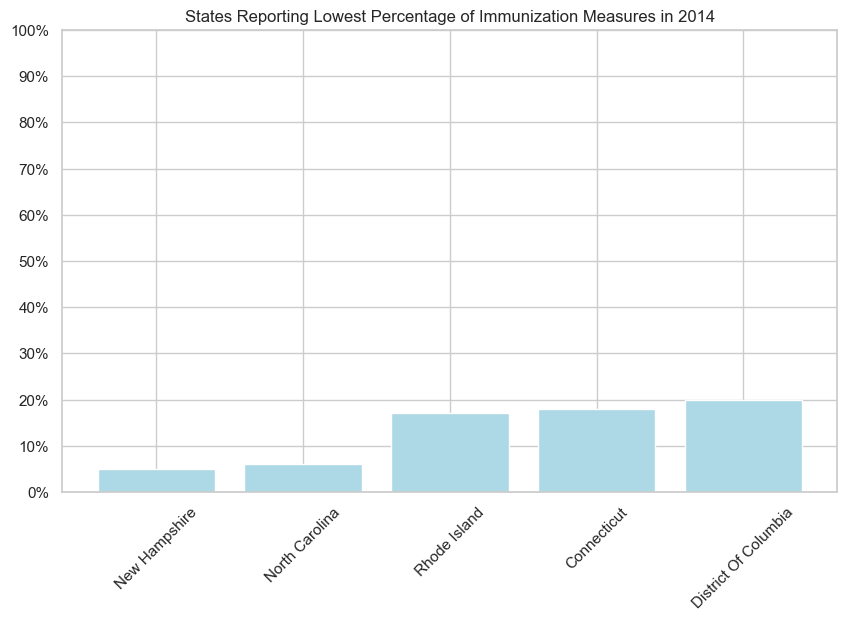

In [5]:
# Plot #5 Lowest Immunization Measures by State
df = pd.read_csv(data_dir / "health_reporting.csv")
df = df.drop(columns=['atleast_one_measure', 'stage_2_hospitals_all_measures','reportable_lab_results_measure','registry_measure','stage_1_hospitals_all_measures','syndromic_surveillance_measure','reportable_lab_results_measure'])
print(df.columns)
df = df.rename(columns={'region': 'state'})
df = df[df['immunization_measure'] != 0]
df = df[df['period'] == 2014]
df = df.fillna(0)
df = df.sort_values(by='immunization_measure', ascending=True)
df = df.head(5)
df['immunization_measure'] = df['immunization_measure'] * 100
df['immunization_measure'] = df['immunization_measure'].astype(int)
print(df)
#plot the data on a bar chart
import matplotlib.pyplot as plt
data = df[['state', 'immunization_measure']]
plt.figure(figsize=(10, 6))
plt.bar(data['state'], data['immunization_measure'], color='lightblue')
plt.yticks(np.arange(0, 101, step=10), [f'{i}%' for i in np.arange(0, 101, step=10)])
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('States Reporting Lowest Percentage of Immunization Measures in 2014')
plt.savefig('lowest_immunization_measures.png')

plt.show()

Index(['region', 'region_code', 'period', 'immunization_measure'], dtype='object')
         state region_code  period  immunization_measure
139    Vermont          VT    2014                   100
52    Kentucky          KY    2014                    98
4       Alaska          AK    2014                    92
28     Florida          FL    2014                    90
70   Minnesota          MN    2014                    88


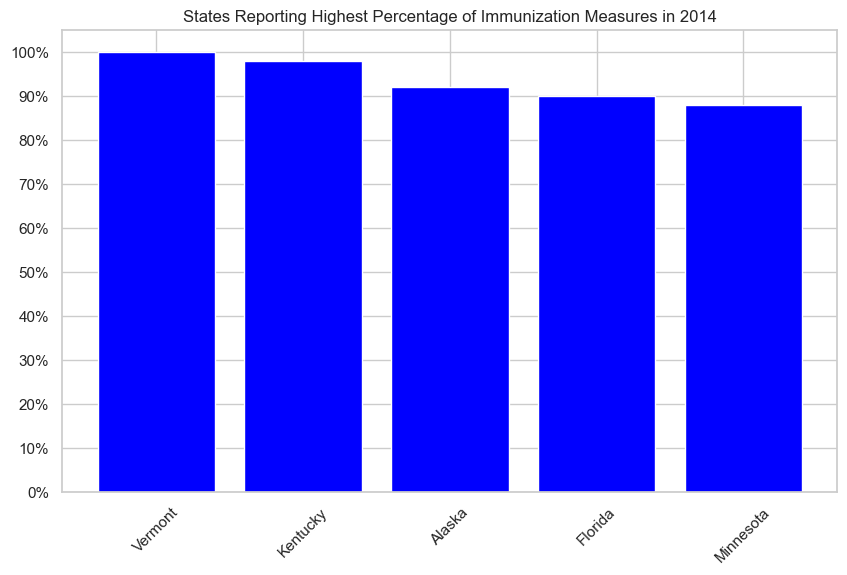

In [6]:
# Plot #6 Highest Immunization Measures by State
df = pd.read_csv(data_dir / "health_reporting.csv")
df = df.drop(columns=['atleast_one_measure', 'stage_2_hospitals_all_measures','reportable_lab_results_measure','registry_measure','stage_1_hospitals_all_measures','syndromic_surveillance_measure','reportable_lab_results_measure'])
print(df.columns)
df = df.rename(columns={'region': 'state'})
df = df[df['immunization_measure'] != 0]
df = df[df['period'] == 2014]
df = df.fillna(0)
#print the 5 highest states with immunization measures
df = df.sort_values(by='immunization_measure', ascending=False)
df = df.head(5)
df['immunization_measure'] = df['immunization_measure'] * 100
df['immunization_measure'] = df['immunization_measure'].astype(int)
print(df)
#Create a bar plot
import matplotlib.pyplot as plt
data = df[['state', 'immunization_measure']]
plt.figure(figsize=(10, 6))
plt.bar(data['state'], data['immunization_measure'], color='Blue')
plt.yticks(np.arange(0, 101, step=10), [f'{i}%' for i in np.arange(0, 101, step=10)])
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)
plt.title('States Reporting Highest Percentage of Immunization Measures in 2014')
plt.savefig('Highest_Immunization_Measures.png')
plt.show()